In [70]:
# import pickle

# # 读取 silency_map_data.pkl 文件
# with open('silency_map_data.pkl', 'rb') as file:
#     loaded_data = pickle.load(file)

# # 获取 Silency Map 和图片标识
# loaded_silency_maps = loaded_data['ground_truth']
# loaded_image_ids = loaded_data['image_ids']
# loaded_image_indices = loaded_data['image_indices']

# # 打印一些示例数据
# num_samples_to_display = 5
# for i in range(num_samples_to_display):
#     print(f"Sample {i+1}:")
#     print("Silency Map:")
#     print(loaded_silency_maps[i])
#     print("Image ID:", loaded_image_ids[i]) 
#     print("Image test:", loaded_image_indices[i])
#     print("\n")

In [71]:
# with open('output.txt', 'w') as output_file:
#     for i, (silency_map, image_id, image_indices) in enumerate(zip(loaded_silency_maps, loaded_image_ids, loaded_image_indices)):
#         output_file.write(f"Sample {i + 1}:\n")
#         output_file.write("Silency Map:\n")
#         output_file.write(str(silency_map) + "\n")
#         output_file.write("Image Test: " + str(image_indices) + "\n")
#         output_file.write("Image ID: " + str(image_id) + "\n\n")


In [72]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision
# import torchvision.transforms as transforms
# import torchvision.datasets as datasets
# from torch.utils.data import DataLoader

In [73]:
# # 设置设备
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [74]:
# import pickle
# import torch
# from torchvision import datasets, transforms

# with open("cifar10_indices_and_saliency_maps.pkl", "rb") as file:
#     indices_and_saliency_maps = pickle.load(file)
    
    # num_samples_to_display = 5
    # for i in range(num_samples_to_display):
    #     print(indices_and_saliency_maps)
    


In [75]:
# # 数据预处理
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),  # 调整输入图像大小
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])

# # 加载CIFAR-10数据集
# train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


In [76]:
# # 实例化ResNet-18模型，并替换最后一层
# model = torchvision.models.resnet18(pretrained=True)
# model.fc = nn.Linear(model.fc.in_features, 10)  # 替换全连接层，适应CIFAR-10的类别数量

# # 将模型移动到设备上
# model = model.to(device)

In [77]:
# import random
# import pickle

In [78]:
# def load_cifar_batch(file_path):
#     with open(file_path, 'rb') as f:
#         batch = pickle.load(f, encoding='bytes')
#     return batch

In [79]:
# # 选择一个随机批次文件
# batch_file = f'data/cifar-10-batches-py/data_batch_{random.randint(1, 5)}'
# batch_data = load_cifar_batch(batch_file)

In [80]:
# # 从批次文件中随机选择5张图像
# num_images = 5
# selected_indices = random.sample(range(10000), num_images)
# selected_images = batch_data[b'data'][selected_indices]
# selected_labels = [batch_data[b'labels'][i] for i in selected_indices]

# # 将图像数据重新整形为32x32x3的数组
# selected_images = selected_images.reshape((-1, 3, 32, 32)).transpose((0, 2, 3, 1))

# # 打印每张图像的来源批次和索引
# for i in range(num_images):
#     print(f"第{i+1}张图像来自 {batch_file} 的label[{selected_labels[i]+1}],是{batch_file}中第{selected_indices[i]+1}个图")


In [81]:
# import pickle
# import random

# def load_cifar_batch(file_path):
#     with open(file_path, 'rb') as f:
#         batch = pickle.load(f, encoding='bytes')
#     return batch

# # 选择一个随机批次文件
# batch_file = f'data/cifar-10-batches-py/data_batch_{random.randint(1, 5)}'
# batch_data = load_cifar_batch(batch_file)

# # 假设 batch_data 包含了图像数据和标签
# images = batch_data[b'data']  # 假设图像数据的键为 'data'
# labels = batch_data[b'labels']  # 假设标签的键为 'labels'

# # 记录每张图片的来源信息
# source_info = []

# for i in range(len(images)):
#     image_info = {
#         'batch_file': batch_file,
#         'label': labels[i],
#         'position_in_batch': i
#     }
#     source_info.append(image_info)

# print(len(images))
# # 打印第一张图片的来源信息
# for i in range (5) :
#     print(source_info[i])

In [82]:
# import pickle

# with open('./data/test_resize.pkl', 'rb') as file:
#     loaded_data = pickle.load(file)

# print(len(loaded_data))
# print(loaded_data[0][0].shape)
# print(loaded_data[0][1].shape)
# # print(loaded_data[0][2].shape)
# # print(loaded_data[0][1].shape)
# # # with open('test.txt', 'w') as txt_file:
# # #     txt_file.write(str(loaded_data))
# # # print(loaded_data)
# # print(loaded_data[0].shape)

In [83]:
# import pickle
# import numpy as np

# with open('./data/test_ground_truth_ori.pkl', 'rb') as file:
#     loaded_data = pickle.load(file)

# # is_all_zero_1 = np.all(loaded_data[0] == 0)
# # print("方法1:", is_all_zero_1)

# # print(len(loaded_data))
# # print(loaded_data[0])
# # print(loaded_data[0][0].shape)

In [84]:
# import pickle
# import numpy as np

# # 加载 test_resize.pkl 的数据
# with open('./data/test_resize.pkl', 'rb') as file:
#     loaded_data_resize = pickle.load(file)

# # 加载 test_ground_truth_resize.pkl 的数据
# with open('./data/test_ground_truth_resize.pkl', 'rb') as file:
#     loaded_data_ground_truth = pickle.load(file)

# # 将 test_ground_truth_resize.pkl 中的 loaded_data[0][0] 放入 test_resize.pkl 中的 loaded_data[0][2]
# loaded_data_resize[0] = (loaded_data_resize[0][0], loaded_data_resize[0][1], loaded_data_ground_truth[0][0])

# # 保存修改后的数据
# with open('./data/test_resize_modified.pkl', 'wb') as file:
#     pickle.dump(loaded_data_resize, file)


In [85]:
# import pickle

# with open('./data/test_resize_modified.pkl', 'rb') as file:
#     loaded_test_data = pickle.load(file)

# with open('./data/train_resize_modified.pkl', 'rb') as file:
#     loaded_train_data = pickle.load(file)

# # print(len(loaded_data))
# print(loaded_train_data[0])
# print(loaded_train_data[0][0].shape)
# print(loaded_train_data[0][1].shape)
# print(loaded_train_data[0][2][0].shape)

# # print(loaded_test_data[0])
# # print(loaded_test_data[0][0].shape)
# # print(loaded_test_data[0][1].shape)
# # print(loaded_test_data[0][2][0].shape)

In [86]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torchvision
# import torchvision.transforms as transforms
# import matplotlib.pyplot as plt
# import numpy as np
# import torchvision.datasets as datasets
# from torch.utils.data import DataLoader

# import pytorch_grad_cam
# from pytorch_grad_cam import GradCAM
# # from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
# from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
# # from scipy.spatial.distance import cosine
# # from torch.nn.functional import cosine_similarity
# from pytorch_grad_cam.utils.image import show_cam_on_image

# batch_size = 1

# # 数据预处理
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),  
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])
# train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# model = torchvision.models.resnet18(pretrained=True)
# model.fc = nn.Linear(model.fc.in_features, 10)
# model.load_state_dict(torch.load('./checkpoints/orisize_resnet18_cifar10_epho10.pth'))

Files already downloaded and verified
Files already downloaded and verified


<All keys matched successfully>

In [87]:
# dataiter = iter(train_loader)
# images, labels = next(dataiter)
# target_layers = [model.layer4[-1]]

In [88]:
#  

In [89]:
# ground_truth

array([[[0.18417795, 0.18417795, 0.18417795, ..., 0.89516675,
         0.89516675, 0.89516675],
        [0.18417795, 0.18417795, 0.18417795, ..., 0.89516675,
         0.89516675, 0.89516675],
        [0.18417795, 0.18417795, 0.18417795, ..., 0.89516675,
         0.89516675, 0.89516675],
        ...,
        [0.05497295, 0.05497295, 0.05497295, ..., 0.09481841,
         0.09481841, 0.09481841],
        [0.05497295, 0.05497295, 0.05497295, ..., 0.09481841,
         0.09481841, 0.09481841],
        [0.05497295, 0.05497295, 0.05497295, ..., 0.09481841,
         0.09481841, 0.09481841]]], dtype=float32)

In [90]:
# ground_truth.shape

(1, 224, 224)

In [91]:
# images_np = images.detach().cpu().numpy()
# images_np = np.transpose(images_np, (0, 2, 3, 1))
# ground_truth = ground_truth[0, :]

In [92]:
# ground_truth.shape

(224, 224)

In [93]:
# visualization = show_cam_on_image(images_np, ground_truth, use_rgb=True)

In [94]:
# # 定义显示图像的函数
# def imshow(img):
#     img = img / 2 + 0.5     # 反标准化
#     npimg = img.numpy() # -> (C, H, W) 
#     # print(npimg.shape)
#     plt.imshow(np.transpose(npimg, (1, 2, 0))) # -> (H, W, C) 
#     plt.axis('off')
#     plt.imsave('./img/ori_image.png',np.transpose(npimg, (1, 2, 0)))
#     plt.show()

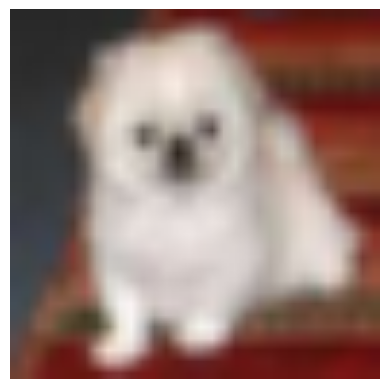

In [95]:
# imshow(torchvision.utils.make_grid(images))

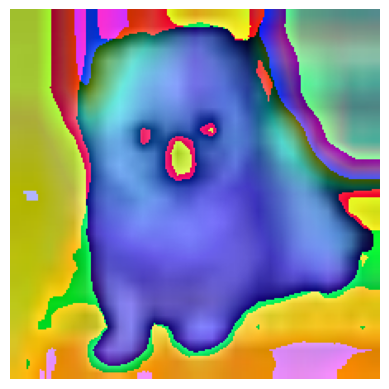

In [96]:
# plt.imshow(visualization[0])
# plt.axis('off')
# plt.imsave("./img/test.png",visualization[0])

In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
batch_size = 16

# 创建一个32×32的全0矩阵
matrix = np.zeros((batch_size, 3, 32, 32))

# 将边缘的2行和2列替换为2（黑色patch的数值）
matrix[:, :, :2, :] = 1
matrix[:, :, -2:, :] = 1
matrix[:, :, :, :2] = 1
matrix[:, :, :, -2:] = 1

# 打印结果
print(matrix)

[[[[1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 0. ... 0. 1. 1.]
   ...
   [1. 1. 0. ... 0. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]]

  [[1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 0. ... 0. 1. 1.]
   ...
   [1. 1. 0. ... 0. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]]

  [[1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 0. ... 0. 1. 1.]
   ...
   [1. 1. 0. ... 0. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]]]


 [[[1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 0. ... 0. 1. 1.]
   ...
   [1. 1. 0. ... 0. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]]

  [[1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 0. ... 0. 1. 1.]
   ...
   [1. 1. 0. ... 0. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]]

  [[1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 0. ... 0. 1. 1.]
   ...
   [1. 1. 0. ... 0. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
 

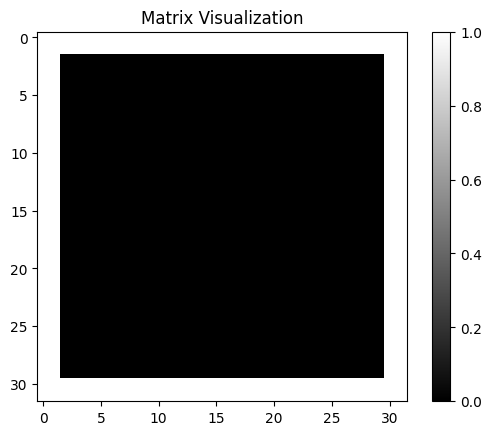

In [6]:
# 取第一个批次的数据进行可视化
image = matrix[0, 0, :, :]

# 使用imshow进行可视化
plt.imshow(image, cmap='gray')
plt.title('Matrix Visualization')
plt.colorbar()
plt.show()

[[[[0.9999997  0.99999923 0.99999816 ... 0.99999816 0.99999923
    0.9999997 ]
   [0.99999923 0.99999804 0.99999529 ... 0.99999529 0.99999804
    0.99999923]
   [0.99999816 0.99999529 0.9999887  ... 0.9999887  0.99999529
    0.99999816]
   ...
   [0.99999816 0.99999529 0.9999887  ... 0.9999887  0.99999529
    0.99999816]
   [0.99999923 0.99999804 0.99999529 ... 0.99999529 0.99999804
    0.99999923]
   [0.9999997  0.99999923 0.99999816 ... 0.99999816 0.99999923
    0.9999997 ]]]]


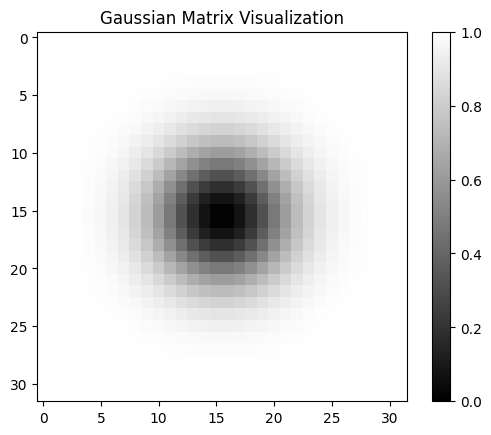

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def create_gaussian_matrix(batch_size, C, H, W):
    # 生成反高斯分布的矩阵
    center = (H - 1) / 2.0  # 中心位置
    x = np.arange(0, H, 1, float)
    y = np.arange(0, W, 1, float)
    x, y = np.meshgrid(x, y)
    d = np.sqrt((x - center)**2 + (y - center)**2)
    sigma, mu = 4.0, 0.0
    matrix = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
    
    # 反转矩阵，使得中间是黑色，边缘是白色
    matrix = 1 - matrix 

    # 扩展维度以适应(batch_size, C, H, W)
    matrix = np.expand_dims(matrix, axis=0)
    matrix = np.expand_dims(matrix, axis=0)
    matrix = np.repeat(matrix, batch_size, axis=0)
    
    return matrix

# 创建反高斯分布的矩阵
matrix = create_gaussian_matrix(batch_size, 3, 32, 32)

# 可视化
image = matrix[0, 0, :, :]
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.title('Gaussian Matrix Visualization')
plt.colorbar()
plt.show()

In [18]:
# np.set_printoptions(threshold=np.inf)
# print(matrix) 